## Artificial Neural Network 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from IPython.display import Image
# 이미지 로드해주는 라이브러리

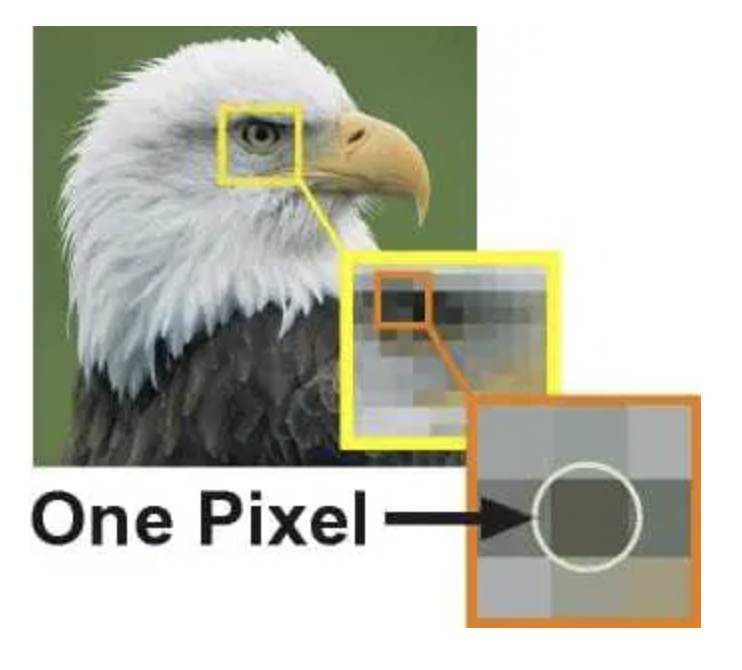

In [4]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/pixel.png')

→ 컴퓨터는 이미지를 픽셀 단위 즉, 숫자로 읽는다. → 앞서 집 값을 예측했던 것 처럼, 각 필셀 하나하나의 값을 input으로 하면 학습이 가능 할 것 같다.

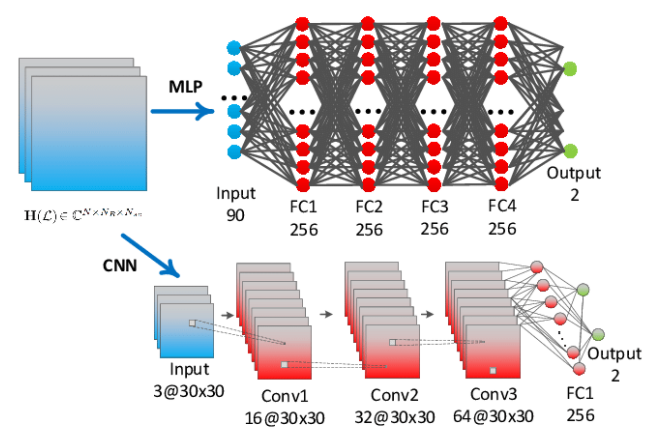

In [5]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/mlp_conv.png')

→ 앞서 boston dataset과 다르지 않다. 이미지도 결국 픽셀값 하나하나를 모델의 input으로 입력한다.<br>아래 CNN은 다음 시간에 배운다.

In [6]:
import numpy as np 
# linear algebra를 다루는 라이브러리
import pandas as pd 
# data processing을 다루는 라이브러리
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# 경고무시

##### 1) 이미지를 불러오고 시각화 : Keras fashion mnist dataset

In [7]:
from tensorflow.keras.datasets import fashion_mnist
# 여러가지 학습용 이미지가 저장되어있는 라이브러리

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# 전체 데이터 셋 6만개 중 5만개는 학습용, 1만개는 테스트 용으로 분리

4431872/4422102 [==============================] - 0s 0us/step


* 데이터 갯수 확인

In [8]:
print('train dataset shape:', train_images.shape, train_labels.shape)
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


* 시각화

In [9]:
import matplotlib.pyplot as plt
# 시각화에 사용하는 라이브러리
%matplotlib inline
# 실행하면 바로 노트북에서 보여줄 수 있게 해주는 역할

In [10]:
train_images[0]
# image 한장이 전부 0~255사이의 숫자-픽셀 값으로 되어있다.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

→ 이미지는 숫자로 이루어져있다.

* 이미지 일부 시각화

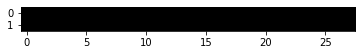

In [11]:
plt.imshow(train_images[0][:2], cmap='gray')
# 첫번째 장의 이미지를 두번째 줄까지 시각화

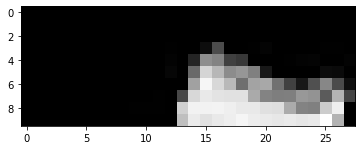

In [12]:
plt.imshow(train_images[0][:10], cmap='gray')
# 첫번째 장의 이미지를 10번째 줄까지 시각화

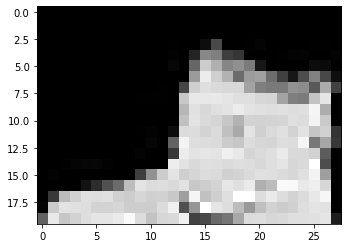

In [13]:
plt.imshow(train_images[0][:20], cmap='gray')
# 첫번째 장의 이미지를 20번째 줄까지 시각화

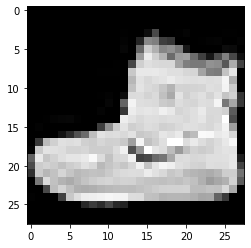

In [14]:
plt.imshow(train_images[0], cmap='gray')
# 첫번째 장의 이미지를 20번째 줄까지 시각화

* Label 확인

In [15]:
train_labels[0]
# 0~9에 해당하는 숫자로 label이 표현되어있다.

9

* 이미지 크기 확인

In [16]:
train_images[0].shape

(28, 28)

Text(0.5, 1.0, '9')

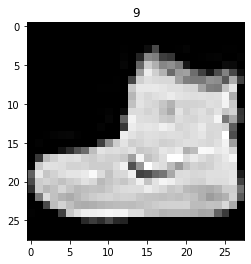

In [17]:
plt.imshow(train_images[0], cmap='gray')
# 첫번째 이미지를 그려보자.
# cmap : color map
plt.title(train_labels[0])
# class 이름을 title

Text(0.5, 1.0, '9')

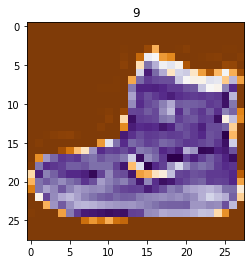

In [18]:
plt.imshow(train_images[0], cmap='PuOr')
plt.title(train_labels[0])

Text(0.5, 1.0, '0')

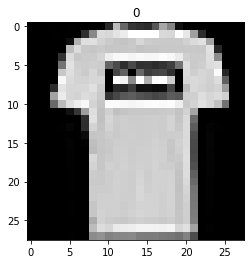

In [19]:
plt.imshow(train_images[1], cmap='gray')
plt.title(train_labels[1])

* class name 입력 : label이 숫자로 나오는 것 보다 name으로 나왔으면 좋겠다.

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# 각 숫자 0~9에 해당하는 class의 정보를 입력

In [21]:
class_names[9]

'Ankle boot'

In [22]:
class_names[1]

'Trouser'

* 한번에 여러개의 이미지 시각화

In [23]:
def show_images(images, labels, ncols=8):
    # 이미지를 한번에 여러개 보여주고 싶다. 여기서는 1x8로 총 8개
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    # 이미지를 보여줄 규격과 1x8에서 각 해당하는 위치를 잡는 것이다. 22x6은 규격, nrows는 행, ncols은 열을 말한다.
    for i in range(ncols):
        # 열만 존재하기에 열 갯수만큼 반복하면서
        axs[i].imshow(images[i], cmap='gray')
        # 각각에 해당하는 위치에 이미지를 시각화한다.
        axs[i].set_title(class_names[labels[i]])
        # 이미지에 해당하는 class_name도 함께 시각화 한다.

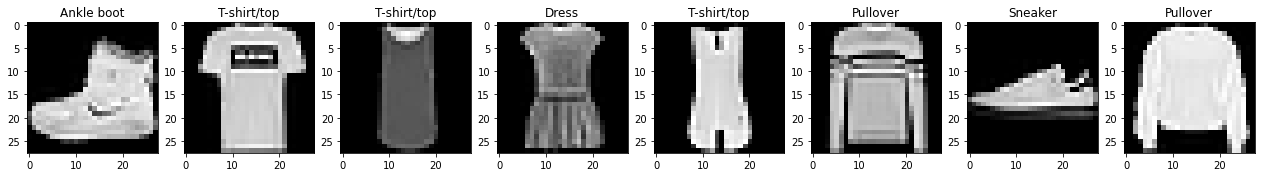

In [ ]:
show_images(train_images[:8], train_labels[:8], ncols=8)

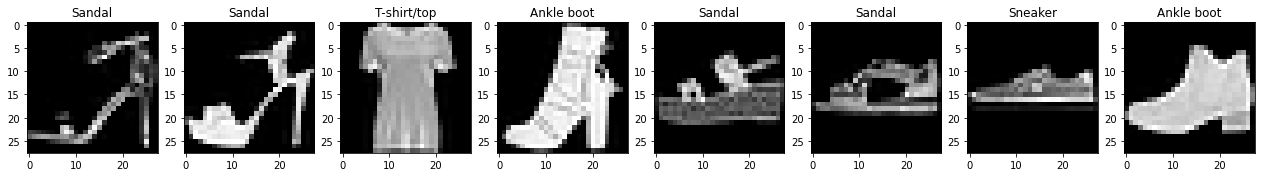

In [24]:
show_images(train_images[8:16], train_labels[8:16], ncols=8)

##### 2) 이미지 정규화

* 0 ~ 255 → 0 ~ 1 : 
<br> scale을 줄임으로 기울기의 크기를 제한. 손실표면을 더 매끄럽게 함.
<br> 빠른 최적화 GD에 용이.

In [25]:
def gpd(images, labels):
    
    images = np.array(images/255.0, dtype=np.float32)
    # 이미지의 픽셀 값을 255로 나눈다.
    labels = np.array(labels)
    # 각각 데이터 타입을 numpy array로 변경한다.
    return images, labels

In [26]:
train_images, train_labels = gpd(train_images, train_labels)
# train에 적용
test_images, test_labels = gpd(test_images, test_labels)
# test에 적용

* 문제 없음을 확인

In [27]:
print('train dataset shape:', train_images.shape, train_labels.shape)
# shape 확인
print('test dataset shape:', test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [28]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

→ 0~1 사이의 값으로 변환

Text(0.5, 1.0, '9')

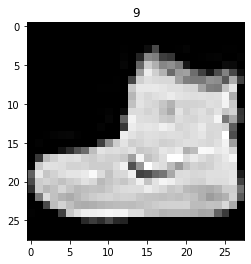

In [29]:
plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

Text(0.5, 1.0, '0')

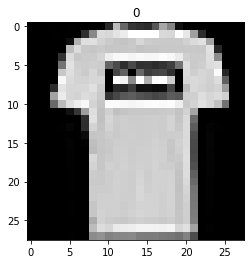

In [30]:
plt.imshow(train_images[1], cmap='gray')
plt.title(train_labels[1])

##### 3) Artificial Neural Network 구축

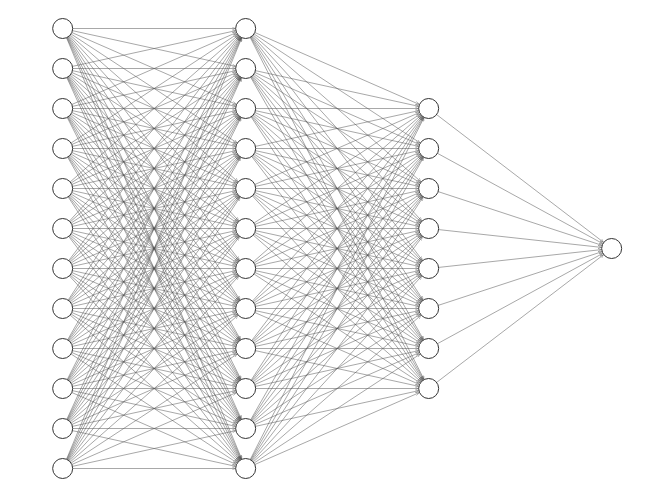

In [31]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/ANN.png')

→ 위와 같은 ANN에 이미지의 픽셀 하나하나를 input으로 입력하여 label을 예측할 것이다.

* Image input size 

Text(0.5, 1.0, '0')

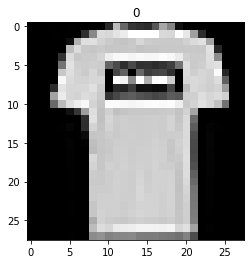

In [32]:
plt.imshow(train_images[1], cmap='gray')
plt.title(train_labels[1])
# 이미지의 가로x세로를 확인해보자 : 28x28

In [33]:
train_images[0].shape

(28, 28)

In [34]:
INPUT_SIZE = 28
# fashion mnist : 28x28

In [35]:
from tensorflow.keras.layers import Dense, Flatten
# perceptron, flatten 해주는 라이브러리 불러오기
from tensorflow.keras.models import Sequential 
# Sequential 하게 모델을 연결해주는 라이브러리 불러오기

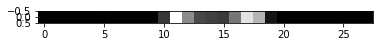

In [36]:
plt.imshow(train_images[1][:1], cmap='gray')

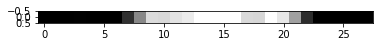

In [37]:
plt.imshow(train_images[1][1:2], cmap='gray')

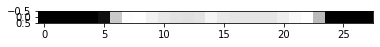

In [38]:
plt.imshow(train_images[1][2:3], cmap='gray')

→ Flatten : 이미지를 한줄씩 읽어서 이어 붙인다.

In [39]:
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    # 처음들어오는 28x28 입력을 784로 펼쳐준다.
    Dense(100, activation='relu'),
    # 784 -> 100
    Dense(30, activation='relu'),
    # 100 -> 30
    Dense(10, activation='softmax')
    # 30 -> 10
    # 최종 출력은 class의 갯수로 한다 
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 30)                3030      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [40]:
784*100 + 100

78500

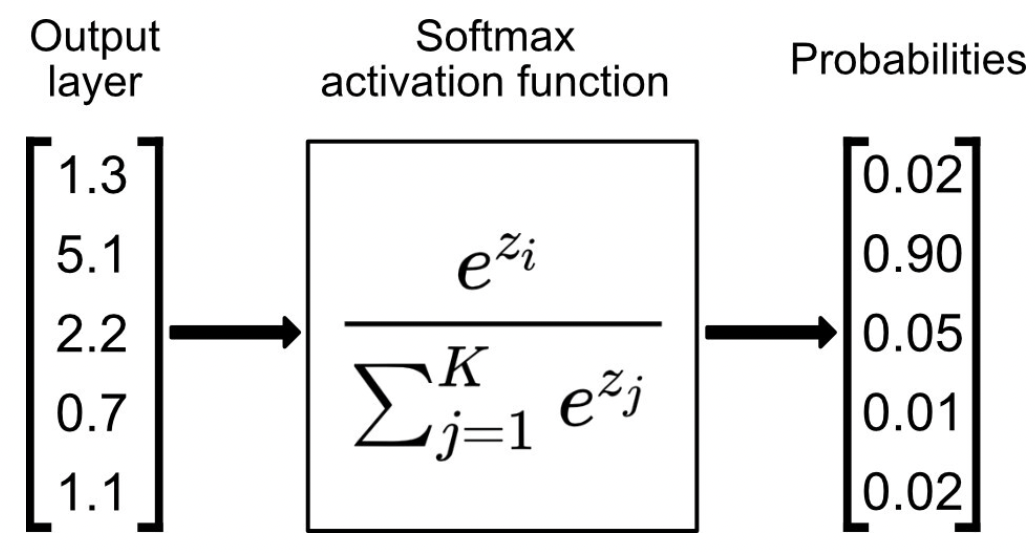

In [41]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/softmax.png')

* Loss와 Optimizer 설정

In [42]:
from tensorflow.keras import optimizers
# optimizer 설정
# CategoryCrossentropy로 loss 설정
from tensorflow.keras.metrics import Accuracy
# 성능 측정하는 지표

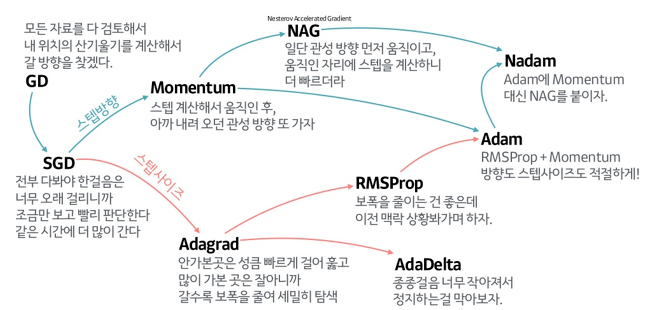

In [43]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/optim.png')

* SGD : 확률적으로 경사하강법을 시행 - 기존에 하던 방법

In [44]:
sgd = optimizers.SGD(learning_rate=0.01, clipnorm=1)

In [45]:
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)
# label을 category 변수로 변경

In [47]:
print(train_labels.shape, test_labels.shape)

(60000,) (10000,)


In [48]:
print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [49]:
train_oh_labels[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [50]:
train_images.shape

(60000, 28, 28)

In [51]:
128*469

60032

In [52]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 1.2132 - accuracy: 0.6247
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.6750 - accuracy: 0.7748
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5820 - accuracy: 0.8041
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5344 - accuracy: 0.8174
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.5059 - accuracy: 0.8255
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4857 - accuracy: 0.8328
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4706 - accuracy: 0.8377
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4582 - accuracy: 0.8418
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4484 - accuracy: 0.8438
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4399 - accuracy: 0.8466

In [53]:
print(history.history['loss'])
# loss의 변화 추이
print(history.history['accuracy'])
# 지표

[1.2132267951965332, 0.6750245690345764, 0.5820229649543762, 0.5344328880310059, 0.5059127807617188, 0.4856644868850708, 0.47059738636016846, 0.45820853114128113, 0.4484436810016632, 0.4398888349533081]
[0.624666690826416, 0.7747666835784912, 0.8041499853134155, 0.8173666596412659, 0.8255333304405212, 0.8327833414077759, 0.8376500010490417, 0.8418333530426025, 0.8438166379928589, 0.8466333150863647]


In [54]:
def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    # x좌표는 epoch y좌표는 accuray
    plt.plot(history.history['loss'], label='loss') 
    plt.legend()

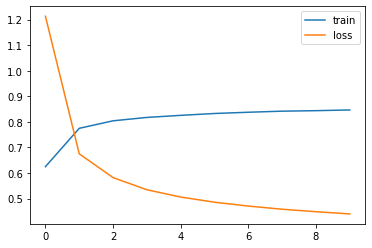

In [55]:
show_history(history)

* Momentum

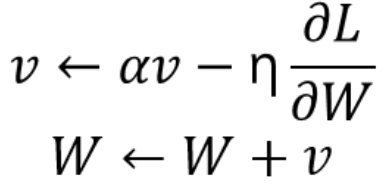

In [56]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/mt.png')

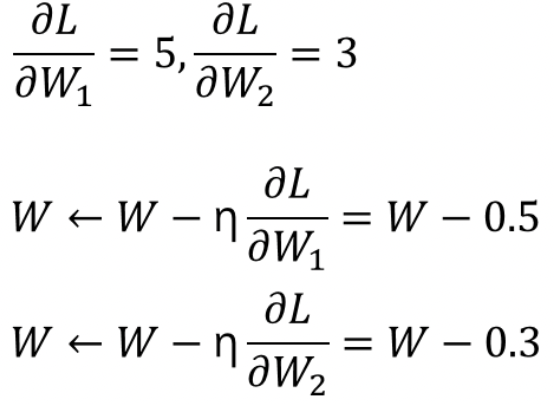

In [57]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/mt2.png')

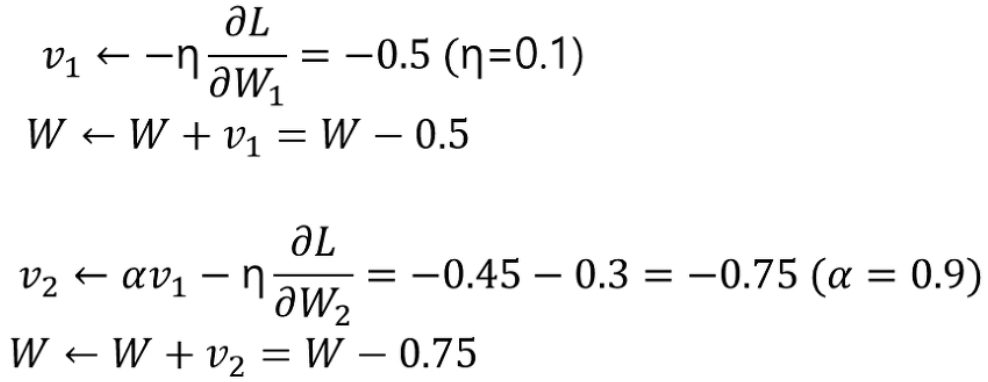

In [58]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/mt3.png')

→ 가던 방향이 계속 같으면 좀 더 가보자.

* Adagrad

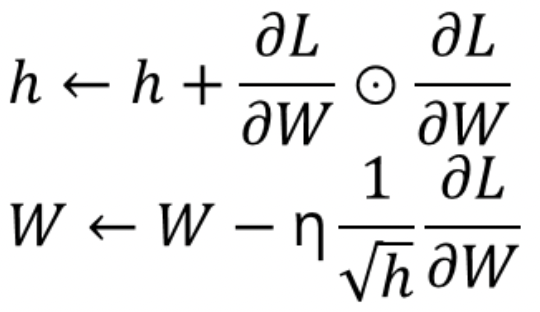

In [59]:
Image('/content/drive/MyDrive/CDS2(2022-2)/img/01/adg.png')

→ 이전의 root_gradient 값으로 나누어주어 이전 GD값이 얼마나 이동하였는지와 반비례하여 학습되게 한다. 즉, 이미 학습이 많이 된 곳은 조금 보폭을 줄이고 학습이 덜 된 곳은 보폭을 늘려보자.

* RMSprop

→ Adagrad의 지수이동 평균을 고려하여 학습 즉, 더 이전의 움직임도 동적으로 관찰하면서 학습해보자.

In [60]:
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    # 처음들어오는 28x28 입력을 784로 펼쳐준다.
    Dense(100, activation='relu'),
    # 784 -> 100
    Dense(30, activation='relu'),
    # 100 -> 30
    Dense(10, activation='softmax')
    # 30 -> 10
    # 최종 출력은 class의 갯수로 한다 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [61]:
rmsp = optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=None, decay=0.0)

In [62]:
model.compile(optimizer=rmsp, loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.5973 - accuracy: 0.7925
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4137 - accuracy: 0.8526
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3689 - accuracy: 0.8668
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3426 - accuracy: 0.8746
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3218 - accuracy: 0.8817
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3067 - accuracy: 0.8862
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2959 - accuracy: 0.8903
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2848 - accuracy: 0.8945
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2734 - accuracy: 0.8987
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2642 - accuracy: 0.9021

* Adam

→ Momentum + RMSProp<br>
즉, 가던 방향이 같으면 계속 더 잘 가보면서(Momentum) 대신 너무 그 방향으로 이미 많이 갔으면 보폭을 줄이고 자주 안간 곳이면 보폭을 늘리는(RMSProp) 방식을 둘다 사용하면서 학습하자.

In [64]:
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    # 처음들어오는 28x28 입력을 784로 펼쳐준다.
    Dense(100, activation='relu'),
    # 784 -> 100
    Dense(30, activation='relu'),
    # 100 -> 30
    Dense(10, activation='softmax')
    # 30 -> 10
    # 최종 출력은 class의 갯수로 한다 
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 10)                310       
                                                                 
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [65]:
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [66]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.5794 - accuracy: 0.8003
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.4088 - accuracy: 0.8543
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3654 - accuracy: 0.8692
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3410 - accuracy: 0.8771
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3197 - accuracy: 0.8831
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3064 - accuracy: 0.8879
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2899 - accuracy: 0.8935
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2798 - accuracy: 0.8972
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.8985
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9023

* test data로 예측 : 이미지 한장의 경우 28x28의 차원이지만, 모델에 사용하려면 학습 당시 입력 데이터의 차원과 동일하게 맞춰줘야한다.<br> :학습 당시 (batch_size) x W x H 로 입력하였다.

In [68]:
test_images[0].shape

(28, 28)

In [69]:
np.expand_dims(test_images[0], axis=0).shape
# train 당시 차원과 차원을 맞춰주기 위해서 첫번째 축(axis=0)에 한 차원 늘려준다. (batch, w, h)

(1, 28, 28)

In [70]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0))
print('softmax output:', pred_proba)
# 각각의 label에 해당하는 확률 출력된다.

softmax output: [[7.7747398e-05 6.0003607e-08 1.3925503e-06 1.5600018e-06 5.6128630e-07
  4.8740888e-03 5.1776342e-06 7.0064522e-02 1.0012382e-03 9.2397362e-01]]


In [71]:
pred = np.argmax(np.squeeze(pred_proba))
# 가장 높은 확률을 갖는 값의 인덱스를 저장한다.
# np.squeeze : 차원 제거
print('predicted class value:', pred)

predicted class value: 9


In [72]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

* 실제 값과 예측 값이 동일한지 확인해본다.

In [73]:
print('target class value:', class_names[test_labels[0]], 'predicted class value:', class_names[pred])

target class value: Ankle boot predicted class value: Ankle boot


* test 전체로 model의 정확도 검증

In [74]:
128*79

10112

In [75]:
model.evaluate(test_images, test_oh_labels, batch_size=128)
# crossentropy의 loss와 accuracy가 출력값이다. train 성능보다 낮은 것을 알 수 있음.

79/79 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.8809


[0.3365590274333954, 0.8809000253677368]

→ 학습 데이터에서보다 테스트 데이터에서 낮은 성능을 보인다. 어떻게 하면 테스트 데이터 성능을 높일 수 있을까?